## Loading necessary libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import SimpleRNN,Dense,Embedding
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

In [3]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data cleaning

In [4]:
df["review"] = df["review"].str.lower()
df["review"] = df["review"].replace(r'[^a-z0-9\s]','',regex = True)

In [5]:
df["sentiment"] = df["sentiment"].apply(lambda x: 1 if x=="positive" else 0)

## Tokenization and Padding 

In [6]:
max_words = 3000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df["review"])

seq = tokenizer.texts_to_sequences(df["review"])

x = pad_sequences(seq,maxlen=max_len)
y = df["sentiment"]

## Train - Test Split

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=43)

## Building Model

In [8]:
model = Sequential([
    Embedding(input_dim = max_words , output_dim= 32, input_length = max_len),
    SimpleRNN(5,return_sequences=True),
    SimpleRNN(5),
    Dense(1, activation='sigmoid')
])
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

C:\Users\msaak\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## Training Model

In [9]:
hist = model.fit(xtrain, ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 19ms/step - accuracy: 0.6463 - loss: 0.6105 - val_accuracy: 0.7770 - val_loss: 0.4819
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.8104 - loss: 0.4416 - val_accuracy: 0.8182 - val_loss: 0.4243
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.8441 - loss: 0.3794 - val_accuracy: 0.8199 - val_loss: 0.4148
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.8411 - loss: 0.3757 - val_accuracy: 0.8203 - val_loss: 0.4282
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8557 - loss: 0.3523 - val_accuracy: 0.8297 - val_loss: 0.4107
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8741 - loss: 0.3111 - val_accuracy: 0.8212 - val_loss: 0.4266
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8824 - loss: 0.2981 - val_accuracy: 0.8250 - val_loss: 0.4524
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.8911 -

## Visualization

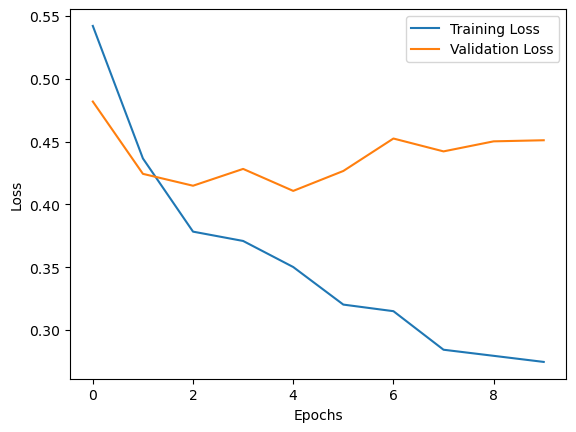

In [10]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()